A

Data Preparing

In [91]:
import pandas as pd
import csv
import os
import numpy as np  
from numpy import nan
from matplotlib import pyplot as plt

In [92]:
current_path = os.getcwd()
filelist = os.listdir(current_path)
tendays_data = []
for i in filelist:
    if i.endswith("00"):
        with open(i,'r', encoding='utf-8' ) as f:
            for j in csv.reader(f):
                tendays_data.append(j)

Table Creating

In [93]:
np.unique(np.array([len(i) for i in tendays_data]))
#Since data should be 19 columns long, we have to clean the dataset first
lengthof8 = 0
lengthof20 = 0
for i in tendays_data:
    if len(i) == 8:
        lengthof8 += 1
    elif len(i) == 20:
        lengthof20 += 1
print(lengthof8,lengthof20)

310879 102571


In [94]:
clean_tendays_data = []
for i in tendays_data:
    if len(i) == 20:
        del i[-1]
        clean_tendays_data.append(i)
    elif len(i) == 8:
        i.extend([nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan])
        clean_tendays_data.append(i)

In [95]:
df = pd.DataFrame(clean_tendays_data,columns=['DriverID',"PlateNumber","Latitude",
                          "Longtitude","Speed","Direction",
                          "SiteName","Time","IsRapidlySpeedup",
                           "IsRapidlySlowdown","IsNeutralSlide",
                          "IsNeutralSlideFinished","NeutralSlideTime",
                          "IsOverspeed","IsOverspeedFinished",
                          "OverspeedTime","IsFatigueDriving",
                          "IsHthrottleStop","IsOilLeak"])

In [96]:
display(df)

,DriverID,PlateNumber,Latitude,Longtitude,Speed,Direction,SiteName,Time,IsRapidlySpeedup,IsRapidlySlowdown,IsNeutralSlide,IsNeutralSlideFinished,NeutralSlideTime,IsOverspeed,IsOverspeedFinished,OverspeedTime,IsFatigueDriving,IsHthrottleStop,IsOilLeak
0,xiexiao1000001,AEB132,31.250834,121.486744,77,326,,2017-01-03 16:00:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,xiexiao1000001,AEB132,31.25268,121.48547,85,326,,2017-01-03 16:00:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,xiexiao1000001,AEB132,31.252941,121.48529,120,326,,2017-01-03 16:00:21,,,,,,1,,,,,
3,xiexiao1000001,AEB132,31.253977,121.484574,120,326,,2017-01-03 16:00:25,,,,,,,1,4,,,
4,xiexiao1000001,AEB132,31.254697,121.484077,66,326,,2017-01-03 16:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413445,xiezhi1000006,A6CU11,32.381073,117.347873,68,106,,2017-01-07 07:59:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413446,xiezhi1000006,A6CU11,32.380419,117.350263,104,106,,2017-01-07 07:59:38,,,,,,,,,1,,
413447,xiezhi1000006,A6CU11,32.380265,117.350829,98,106,,2017-01-07 07:59:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413448,xiezhi1000006,A6CU11,32.37966,117.353041,77,106,,2017-01-07 07:59:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df["PlateNumber"].unique()

array(['AEB132', 'AT75H8', 'ADJ750', 'AZQ110', 'AVM936', 'A709GB',
       'A58M83', 'AZI419', 'AX542C', 'A6CU11'], dtype=object)

In [98]:
df["DriverID"].unique()

array(['xiexiao1000001', 'duxu1000009', 'shenxian1000004',
       'zengpeng1000000', 'likun1000003', 'haowei1000008', 'zouan1000007',
       'hanhui1000002', 'panxian1000005', 'xiezhi1000006'], dtype=object)

413450 records（102571 of them are detailed records); 10 drivers

Data Cleaning

In [99]:
for i in df:
    df[i] = df[i].replace(nan,0)
    df[i] = df[i].replace("",0)

In [100]:
for i in  ['DriverID',"PlateNumber","Latitude",
                          "Longtitude","Speed","Direction",
                          "SiteName","Time"]:
    df[i] = df[i].replace(0,nan)
display(df)

,DriverID,PlateNumber,Latitude,Longtitude,Speed,Direction,SiteName,Time,IsRapidlySpeedup,IsRapidlySlowdown,IsNeutralSlide,IsNeutralSlideFinished,NeutralSlideTime,IsOverspeed,IsOverspeedFinished,OverspeedTime,IsFatigueDriving,IsHthrottleStop,IsOilLeak
0,xiexiao1000001,AEB132,31.250834,121.486744,77,326,NaN,2017-01-03 16:00:10,0,0,0,0,0,0,0,0,0,0,0
1,xiexiao1000001,AEB132,31.25268,121.48547,85,326,NaN,2017-01-03 16:00:20,0,0,0,0,0,0,0,0,0,0,0
2,xiexiao1000001,AEB132,31.252941,121.48529,120,326,NaN,2017-01-03 16:00:21,0,0,0,0,0,1,0,0,0,0,0
3,xiexiao1000001,AEB132,31.253977,121.484574,120,326,NaN,2017-01-03 16:00:25,0,0,0,0,0,0,1,4,0,0,0
4,xiexiao1000001,AEB132,31.254697,121.484077,66,326,NaN,2017-01-03 16:00:30,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413445,xiezhi1000006,A6CU11,32.381073,117.347873,68,106,NaN,2017-01-07 07:59:30,0,0,0,0,0,0,0,0,0,0,0
413446,xiezhi1000006,A6CU11,32.380419,117.350263,104,106,NaN,2017-01-07 07:59:38,0,0,0,0,0,0,0,0,1,0,0
413447,xiezhi1000006,A6CU11,32.380265,117.350829,98,106,NaN,2017-01-07 07:59:40,0,0,0,0,0,0,0,0,0,0,0
413448,xiezhi1000006,A6CU11,32.37966,117.353041,77,106,NaN,2017-01-07 07:59:50,0,0,0,0,0,0,0,0,0,0,0


B

In [101]:
df["Time"][1][:10]

'2017-01-03'

In [102]:
df["Date"] = [i[:10] for i in df.Time]
df["Time_detail"] = [i[11:] for i in df.Time]
df.Date.unique()

array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-02',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
       '2017-01-01', '2017-01-10', '2017-01-11'], dtype=object)

In [103]:
df["IsOverspeed"] = pd.to_numeric(df.IsOverspeed, downcast="integer")
df["IsFatigueDriving"] = pd.to_numeric(df.IsFatigueDriving, downcast="integer")
df["NeutralSlideTime"] = pd.to_numeric(df.NeutralSlideTime, downcast="integer")
df["OverspeedTime"] = pd.to_numeric(df.OverspeedTime, downcast="integer")

In [104]:
df.groupby(["Date","PlateNumber"])["IsOverspeed","IsFatigueDriving","NeutralSlideTime","OverspeedTime"].sum()

/var/folders/1n/yj2pk4_15zx9lf567x3ddqcm0000gn/T/ipykernel_35019/3627140746.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Date","PlateNumber"])["IsOverspeed","IsFatigueDriving","NeutralSlideTime","OverspeedTime"].sum()


IsOverspeed  IsFatigueDriving  NeutralSlideTime  \
Date       PlateNumber                                                    
2017-01-01 A58M83             192.0             224.0              90.0   
           A6CU11             404.0             497.0             321.0   
           A709GB             107.0             113.0              32.0   
           ADJ750             220.0             262.0             372.0   
           AEB132             477.0             580.0             677.0   
...                             ...               ...               ...   
2017-01-11 ADJ750             268.0             323.0             169.0   
           AVM936             183.0             175.0             113.0   
           AX542C              56.0              57.0              69.0   
           AZI419             271.0             303.0             206.0   
           AZQ110              58.0              66.0              63.0   

                        OverspeedTime  
Date       PlateNumber                 
2017-01-01 A58M83                1810  
           A6CU11                3906  
           A709GB                 895  
           ADJ750                2217  
           AEB132                4866  
...                               ...  
2017-01-11 ADJ750                2811  
           AVM936                1626  
           AX542C                 529  
           AZI419                2533  
           AZQ110                 501  

[98 rows x 4 columns]

In [105]:
behavior_stat = df.groupby(["Date","PlateNumber"])["IsOverspeed","IsFatigueDriving","NeutralSlideTime","OverspeedTime"].sum()
behavior_stat.to_csv("behavior statistics",index = True)

/var/folders/1n/yj2pk4_15zx9lf567x3ddqcm0000gn/T/ipykernel_35019/1681202058.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  behavior_stat = df.groupby(["Date","PlateNumber"])["IsOverspeed","IsFatigueDriving","NeutralSlideTime","OverspeedTime"].sum()


C

In [106]:
df.Time = pd.to_datetime(df.Time,format = "%Y-%m-%d %H:%M:%S")
df["Speed"] = pd.to_numeric(df.Speed, downcast="integer")
df["Hour"] = pd.to_datetime(df.Time.astype(str)).dt.hour
df["Date"] = pd.to_datetime(df.Date,format = "%Y-%m-%d").dt.normalize()

In [107]:
group_data = df.groupby("Date")["Speed","Hour","PlateNumber"]

/var/folders/1n/yj2pk4_15zx9lf567x3ddqcm0000gn/T/ipykernel_35019/3517456518.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_data = df.groupby("Date")["Speed","Hour","PlateNumber"]


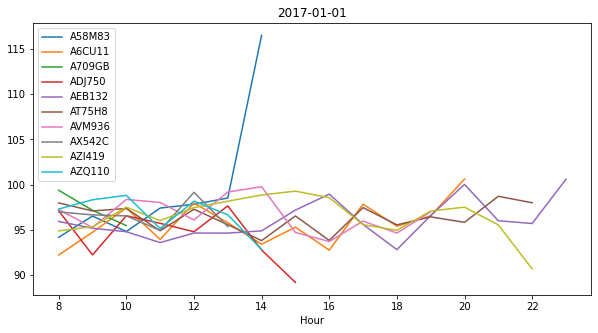

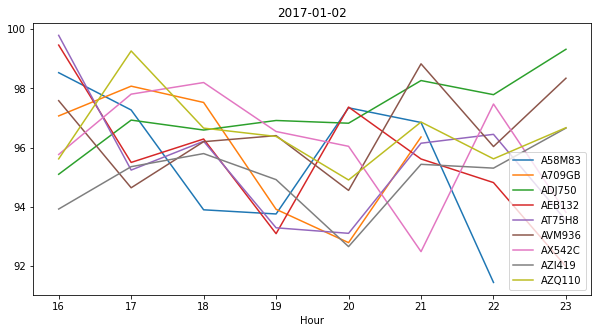

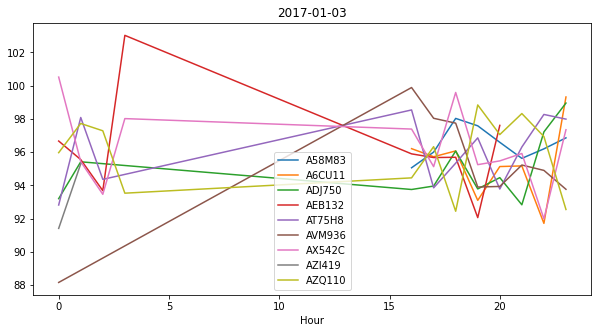

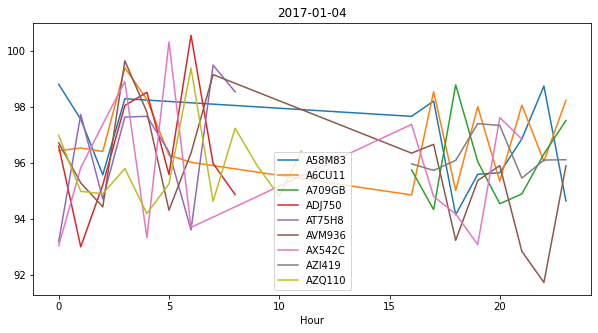

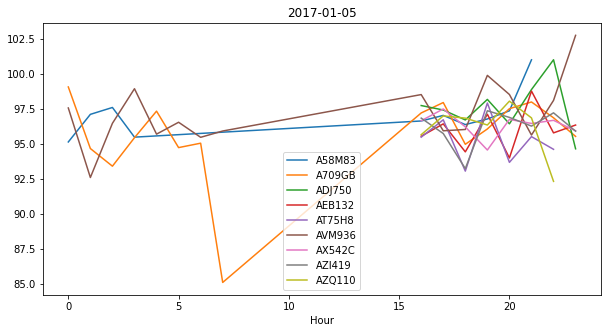

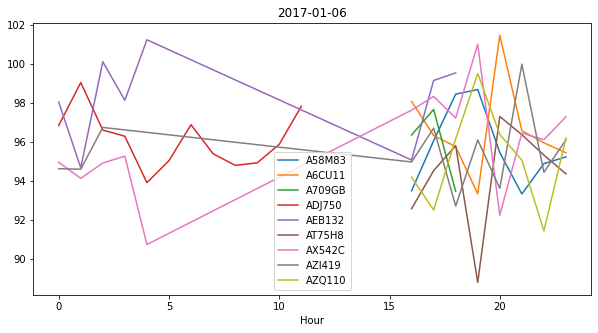

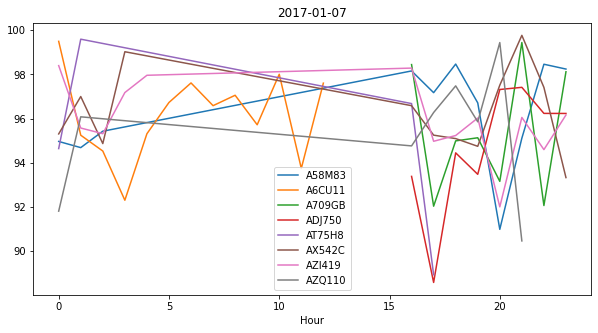

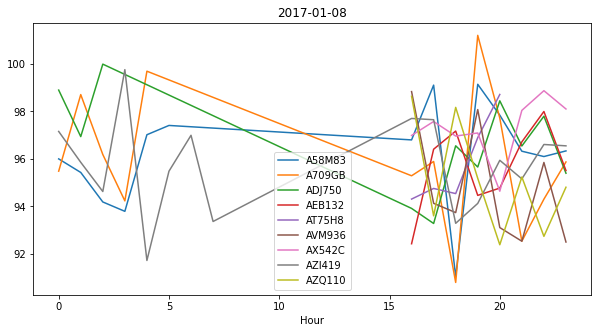

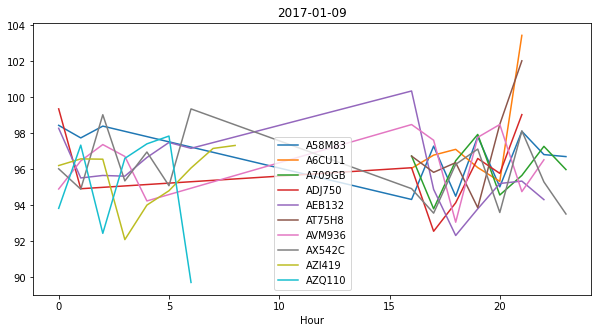

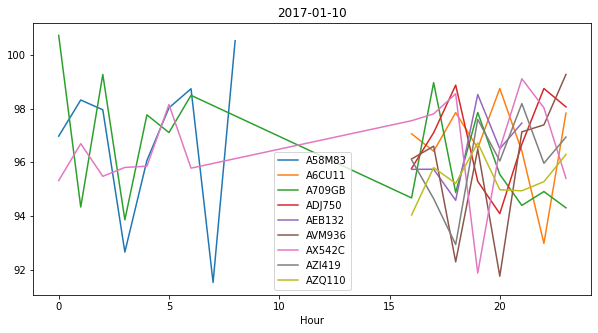

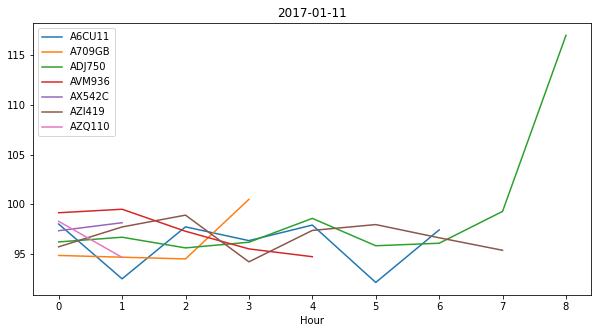

In [108]:
for i in ["2017-01-01","2017-01-02","2017-01-03",
         "2017-01-04","2017-01-05","2017-01-06",
         "2017-01-07","2017-01-08","2017-01-09",
         "2017-01-10","2017-01-11"]:
    one_day_data = group_data.get_group(i).groupby(["Hour","PlateNumber"]).agg(Speed=('Speed', 'mean')).reset_index()
    fig, ax = plt.subplots(figsize=(10,5))
    one_day_data.set_index('Hour', inplace=True)
    one_day_data.groupby('PlateNumber')['Speed'].plot(legend=True,title=i)

first_day = group_data.get_group("2017-01-01") 
first_day.set_index('PlateNumber', inplace=True)
first_day.groupby('Time_detail')['Speed'].plot(legend=True)

D

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [111]:
df["Direction"] = pd.to_numeric(df.Direction, downcast="integer")
df["IsRapidlySpeedup"] = pd.to_numeric(df.IsRapidlySpeedup, downcast="integer")
df["IsRapidlySlowdown"] = pd.to_numeric(df.IsRapidlySlowdown, downcast="integer")
df["IsNeutralSlide"] = pd.to_numeric(df.IsNeutralSlide, downcast="integer")
df["IsNeutralSlideFinished"] = pd.to_numeric(df.IsNeutralSlideFinished, downcast="integer")
df["NeutralSlideTime"] = pd.to_numeric(df.NeutralSlideTime, downcast="integer")
df["IsOverspeed"] = pd.to_numeric(df.IsOverspeed, downcast="integer")
df["IsOverspeedFinished"] = pd.to_numeric(df.IsOverspeedFinished, downcast="integer")
df["OverspeedTime"] = pd.to_numeric(df.OverspeedTime, downcast="integer")
df["IsHthrottleStop"] = pd.to_numeric(df.IsHthrottleStop, downcast="integer")
df["IsOilLeak"] = pd.to_numeric(df.IsOilLeak, downcast="integer")

In [112]:
reg_1 = smf.ols("IsFatigueDriving~Speed+Direction+IsRapidlySpeedup+IsRapidlySlowdown+IsNeutralSlide+IsNeutralSlideFinished+IsOverspeedFinished+IsOverspeed+OverspeedTime+IsHthrottleStop+IsOilLeak+Hour",data =df
        ).fit()


In [113]:
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:       IsFatigueDriving   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7464
Date:                Sat, 12 Nov 2022   Prob (F-statistic):              0.707
Time:                        23:58:33   Log-Likelihood:                -53364.
No. Observations:              413450   AIC:                         1.068e+05
Df Residuals:                  413437   BIC:                         1.069e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0